<a href="https://colab.research.google.com/github/aaditya1004/ImageDenoising/blob/master/identifyDefects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!rm -rf Images

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import zipfile as z
!unzip '/content/Images.zip'



Archive:  /content/Images.zip
   creating: Images/
  inflating: Images/noisy726.jpg     
  inflating: Images/noisy732.jpg     
   creating: __MACOSX/
   creating: __MACOSX/Images/
  inflating: __MACOSX/Images/._noisy732.jpg  
  inflating: Images/noisy281.jpg     
  inflating: Images/noisy295.jpg     
  inflating: Images/noisy524.jpg     
  inflating: Images/noisy242.jpg     
  inflating: Images/noisy256.jpg     
  inflating: Images/noisy530.jpg     
  inflating: Images/noisy518.jpg     
  inflating: __MACOSX/Images/._noisy518.jpg  
  inflating: Images/noisy493.jpg     
  inflating: Images/noisy487.jpg     
  inflating: Images/noisy450.jpg     
  inflating: Images/noisy336.jpg     
  inflating: Images/noisy322.jpg     
  inflating: __MACOSX/Images/._noisy322.jpg  
  inflating: Images/noisy444.jpg     
  inflating: Images/noisy478.jpg     
  inflating: Images/noisy691.jpg     
  inflating: Images/noisy685.jpg     
  inflating: Images/noisy134.jpg     
  inflating: Images/noisy652.jpg    

In [0]:
import numpy as np
import pandas as pd 

In [5]:
train = pd.read_csv('train_labels.csv')
print(train.head())

    image  Noise  Blur  Low Light  Low Resolution   Compression Artifact 
0  noisy1      0     0          0                1                      0
1  noisy2      1     0          1                1                      0
2  noisy3      1     1          0                1                      1
3  noisy4      1     0          1                0                      1
4  noisy5      1     1          1                0                      0


In [6]:
train.shape[0]

750

In [7]:
y = np.array(train.drop(['image'],axis = 1))
y.shape

(750, 5)

In [8]:
from keras.preprocessing import image
import tqdm as tqdm



Using TensorFlow backend.


In [0]:
train_image = []
for i in range (750):
  img = image.load_img('/content/Images/'+train['image'][i]+'.jpg',target_size=(256,256,3))
  img = image.img_to_array(img)
  img = img/255
  train_image.append(img)
  
x = np.array(train_image)

In [10]:
x.shape

(750, 256, 256, 3)

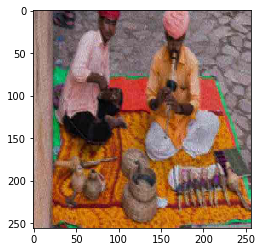

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x[7])

In [16]:
y[7]

array([0, 0, 0, 1, 1])

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.1)

In [0]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten

model = Sequential()

In [0]:
model.add(Conv2D(16,(3,3),activation = 'relu',input_shape=(256,256,3))) 
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

In [0]:
model.add(Conv2D(32,(3,3),activation  = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

In [0]:
model.add(Conv2D(64,(3,3),activation  = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

In [0]:
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

In [0]:
model.add(Dense(5, activation='sigmoid'))


In [88]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [92]:

model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=64)

Train on 675 samples, validate on 75 samples
Epoch 1/100
675/675 [==============================] - 2s 3ms/step - loss: 0.6896 - acc: 0.5422 - val_loss: 0.6972 - val_acc: 0.4933
Epoch 2/100
675/675 [==============================] - 1s 2ms/step - loss: 0.6896 - acc: 0.5422 - val_loss: 0.6972 - val_acc: 0.4933
Epoch 3/100
675/675 [==============================] - 1s 2ms/step - loss: 0.6895 - acc: 0.5422 - val_loss: 0.6972 - val_acc: 0.4933
Epoch 4/100
675/675 [==============================] - 1s 2ms/step - loss: 0.6893 - acc: 0.5422 - val_loss: 0.6973 - val_acc: 0.4933
Epoch 5/100
675/675 [==============================] - 1s 2ms/step - loss: 0.6895 - acc: 0.5422 - val_loss: 0.6972 - val_acc: 0.4933
Epoch 6/100
675/675 [==============================] - 1s 2ms/step - loss: 0.6897 - acc: 0.5422 - val_loss: 0.6972 - val_acc: 0.4933
Epoch 7/100
675/675 [==============================] - 1s 2ms/step - loss: 0.6895 - acc: 0.5422 - val_loss: 0.6973 - val_acc: 0.4933
Epoch 8/100
675/675 [===

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [100]:
datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch= 50, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
50/50 [==============================] - 19s 388ms/step - loss: 0.6889 - acc: 0.5445 - val_loss: 0.6979 - val_acc: 0.4933
Epoch 2/20
50/50 [==============================] - 19s 383ms/step - loss: 0.6900 - acc: 0.5382 - val_loss: 0.6977 - val_acc: 0.4933
Epoch 3/20
50/50 [==============================] - 19s 382ms/step - loss: 0.6892 - acc: 0.5431 - val_loss: 0.6978 - val_acc: 0.4933
Epoch 4/20
50/50 [==============================] - 19s 375ms/step - loss: 0.6894 - acc: 0.5404 - val_loss: 0.6976 - val_acc: 0.4933
Epoch 5/20
50/50 [==============================] - 19s 383ms/step - loss: 0.6895 - acc: 0.5409 - val_loss: 0.6973 - val_acc: 0.4933
Epoch 6/20
50/50 [==============================] - 19s 386ms/step - loss: 0.6893 - acc: 0.5425 - val_loss: 0.6971 - val_acc: 0.4933
Epoch 7/20
50/50 [==============================] - 19s 378ms/step - loss: 0.6901 - acc: 0.5387 - val_loss: 0.6973 - val_acc: 0.4933
Epoch 8/20
50/50 [==============================] - 19s 375ms/step - 

In [109]:
score = model.predict(x_test)
score[0]

array([0.4692537 , 0.4401942 , 0.4708998 , 0.46447688, 0.44325987],
      dtype=float32)

In [0]:
img = image.load_img('/content/batman_-the-animated-series-wallpapers-31516-8657587.jpg',target_size=(256,256,3))
img = image.img_to_array(img)
img = img/255

Low Resolution  (0.471)
Blur (0.469)
Compression Artifact  (0.464)


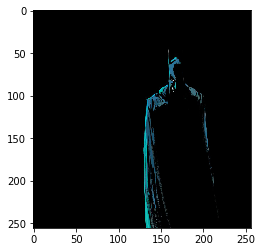

In [113]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,256,256,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
  print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)